# Importando a Base de Dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/bases_de_dados/tips.csv')
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo os dados

In [3]:
# alterando o nome das colunas e traduzindo a coluna 'Sobremesa'
df.columns = ['Total da Conta', 'Gorjeta', 'Sobremesa', 'Dia', 'Horário', 'Pessoas']
df['Sobremesa'] = df['Sobremesa'].apply(lambda x: 'Sim' if x == 'Yes' else 'Não')
df

,Total da Conta,Gorjeta,Sobremesa,Dia,Horário,Pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [4]:
# traduzindo a coluna 'Dia'
df['Dia'].unique()
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta-feira', 
    'Fri': 'Sexta-feira'
}

df['Dia'].replace(dias, inplace=True)
df

,Total da Conta,Gorjeta,Sobremesa,Dia,Horário,Pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Dinner,3
240,27.18,2.00,Sim,Sábado,Dinner,2
241,22.67,2.00,Sim,Sábado,Dinner,2
242,17.82,1.75,Não,Sábado,Dinner,2


In [5]:
# traduzindo a coluna 'Horário'
df['Horário'].unique()
df['Horário'] = df['Horário'].apply(lambda x: 'Almoço' if x == 'Lunch' else 'Janta')
df

,Total da Conta,Gorjeta,Sobremesa,Dia,Horário,Pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Janta,3
240,27.18,2.00,Sim,Sábado,Janta,2
241,22.67,2.00,Sim,Sábado,Janta,2
242,17.82,1.75,Não,Sábado,Janta,2


# Importando o Seaborn

In [6]:
import seaborn as sns

In [7]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, matplotlib, scipy, pandas
Required-by: missingno


# Análise I  - Valor da conta e gorjeta

In [8]:
df.columns

Index(['Total da Conta', 'Gorjeta', 'Sobremesa', 'Dia', 'Horário', 'Pessoas'], dtype='object')

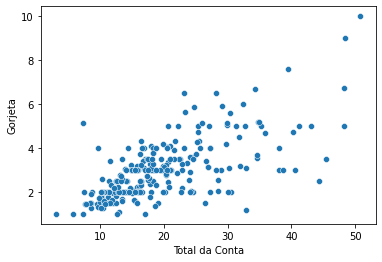

In [9]:
valor_gorjeta = sns.scatterplot(x='Total da Conta', y='Gorjeta', data=df)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

## Criando o campo Porcentagem

In [10]:
df['Porcentagem'] = (df['Gorjeta'] / df['Total da Conta']).round(2)
df

,Total da Conta,Gorjeta,Sobremesa,Dia,Horário,Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Janta,3,0.20
240,27.18,2.00,Sim,Sábado,Janta,2,0.07
241,22.67,2.00,Sim,Sábado,Janta,2,0.09
242,17.82,1.75,Não,Sábado,Janta,2,0.10


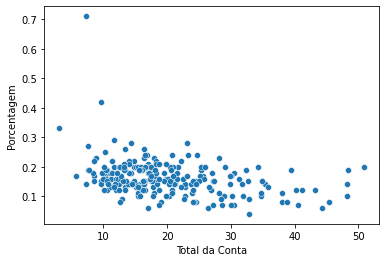

In [11]:
porcentagem_conta = sns.scatterplot(x='Total da Conta', y='Porcentagem', data=df)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

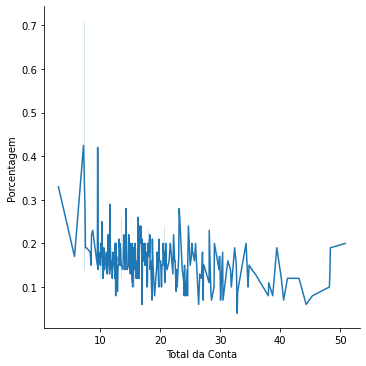

In [12]:
porcentagem_conta_linha = sns.relplot(x='Total da Conta', y='Porcentagem', kind='line', data=df)

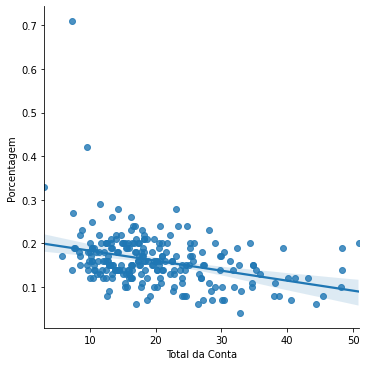

In [13]:
sns.lmplot(x='Total da Conta', y='Porcentagem', data=df)

**Adicionando títulos ao gráfico**

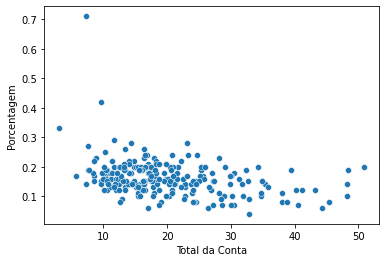

In [14]:
porcentagem_conta.get_figure()

In [15]:
porcentagem_conta.figure.suptitle('Valor da conta x Gorjeta')

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

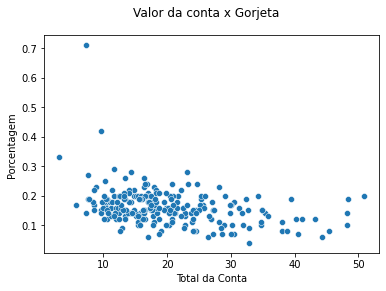

In [16]:
porcentagem_conta.get_figure()

In [17]:
porcentagem_conta.set_title('Análise do valor da gorjeta em função do valor da conta')

Text(0.5, 1.0, 'Análise do valor da gorjeta em função do valor da conta')

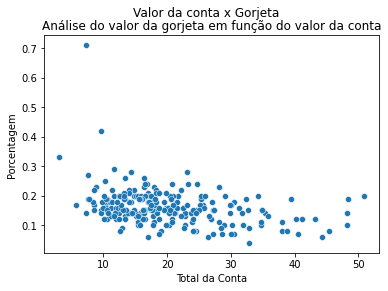

In [18]:
porcentagem_conta.get_figure()

In [19]:
porcentagem_conta.set(xlabel='Valor da Conta', ylabel='Valor da Gorjeta')

[Text(17.200000000000003, 0.5, 'Valor da Gorjeta'),
 Text(0.5, 17.200000000000003, 'Valor da Conta')]

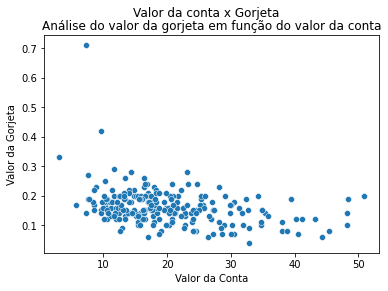

In [20]:
porcentagem_conta.get_figure()

In [21]:
# salvando o gráfico
imagem = porcentagem_conta.get_figure()
imagem.savefig('figura.png')

# Análise II - Sobremesa

In [22]:
# pessoas que pediram sobremesa
df[df['Sobremesa'] == 'Sim'].describe()

,Total da Conta,Gorjeta,Pessoas,Porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [23]:
# pessoas que não pediram sobremesa
df[df['Sobremesa'] == 'Não'].describe()

,Total da Conta,Gorjeta,Pessoas,Porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


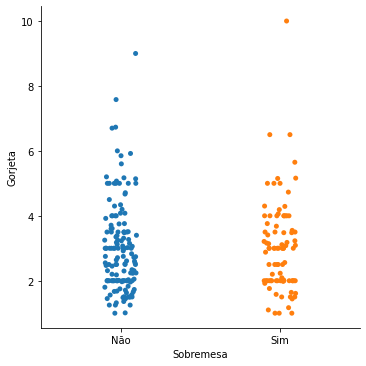

In [24]:
sns.catplot(x='Sobremesa', y='Gorjeta', data=df)

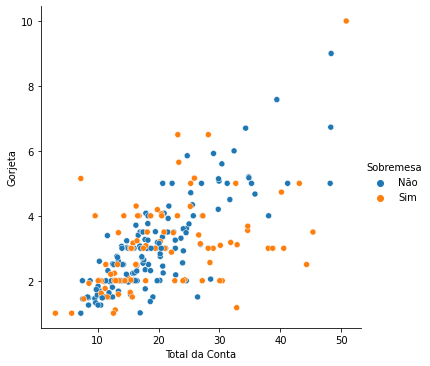

In [36]:
sns.relplot(x='Total da Conta', y='Gorjeta', hue='Sobremesa', data=df)

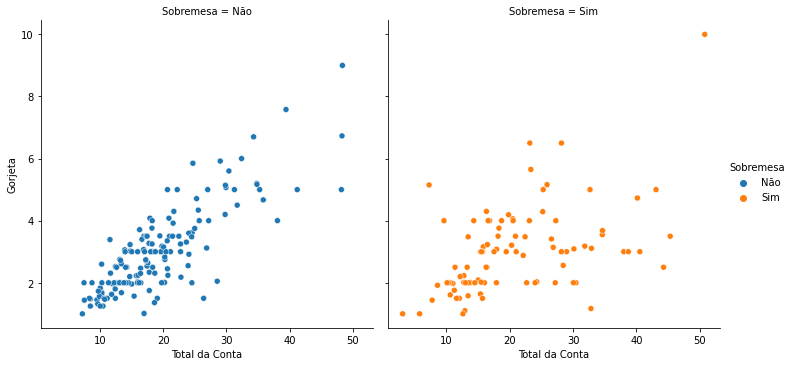

In [26]:
sns.relplot(x='Total da Conta', y='Gorjeta', hue='Sobremesa', col='Sobremesa', data=df)

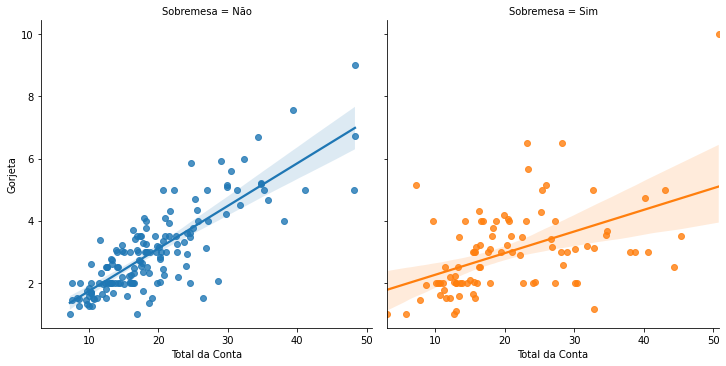

In [27]:
sns.lmplot(x='Total da Conta', y='Gorjeta', hue='Sobremesa', col='Sobremesa', data=df)

# Análise III - Dia da Semana

In [28]:
df

,Total da Conta,Gorjeta,Sobremesa,Dia,Horário,Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Janta,3,0.20
240,27.18,2.00,Sim,Sábado,Janta,2,0.07
241,22.67,2.00,Sim,Sábado,Janta,2,0.09
242,17.82,1.75,Não,Sábado,Janta,2,0.10


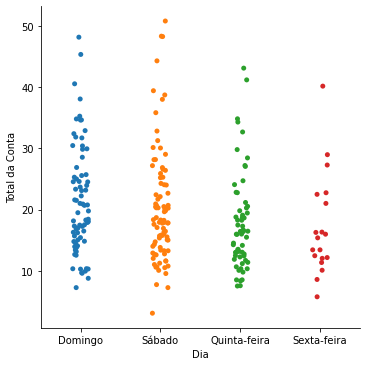

In [29]:
sns.catplot(x='Dia', y='Total da Conta', data=df)

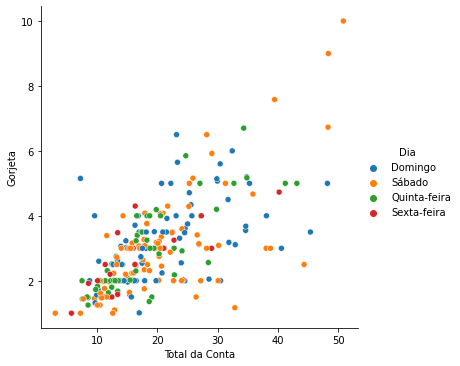

In [30]:
sns.relplot(x='Total da Conta', y='Gorjeta', hue='Dia', data=df)

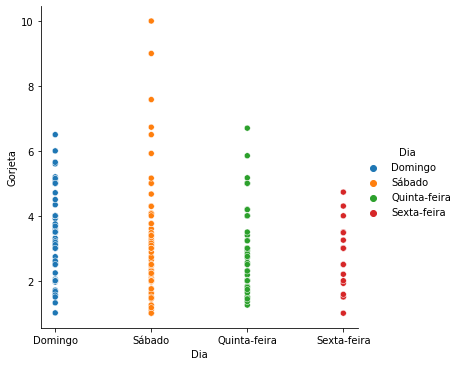

In [31]:
sns.relplot(x='Dia', y='Gorjeta', hue='Dia', data=df)

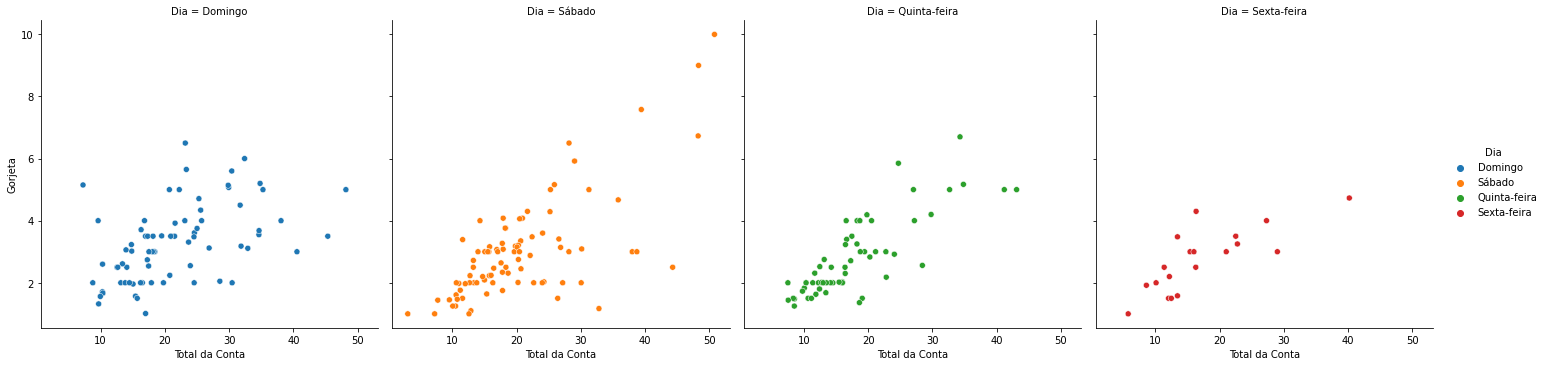

In [32]:
sns.relplot(x='Total da Conta', y='Gorjeta', hue='Dia', col='Dia', data=df)

In [33]:
dias_semana = df.groupby('Dia')
dias_semana[['Total da Conta', 'Gorjeta']].mean().round(2)

,Total da Conta,Gorjeta
Dia,,
Domingo,21.41,3.26
Quinta-feira,17.68,2.77
Sexta-feira,17.15,2.73
Sábado,20.44,2.99


In [37]:
df['Dia'].value_counts()

Sábado          87
Domingo         76
Quinta-feira    62
Sexta-feira     19
Name: Dia, dtype: int64

# Análise IV - Hora do Dia

In [38]:
df.head()

,Total da Conta,Gorjeta,Sobremesa,Dia,Horário,Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


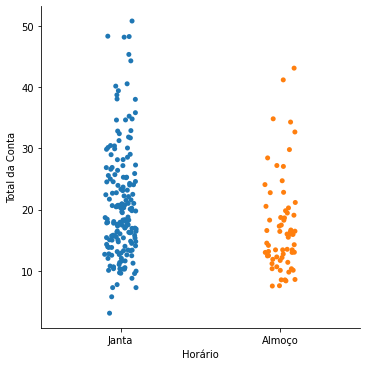

In [39]:
sns.catplot(x='Horário', y='Total da Conta', data=df)

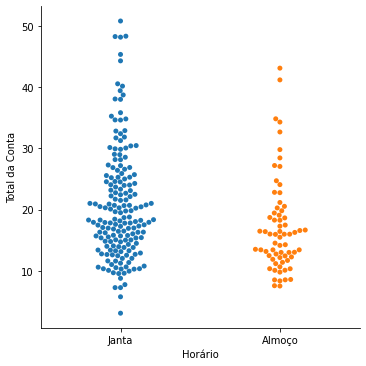

In [44]:
sns.catplot(x='Horário', y='Total da Conta', kind='swarm', data=df)

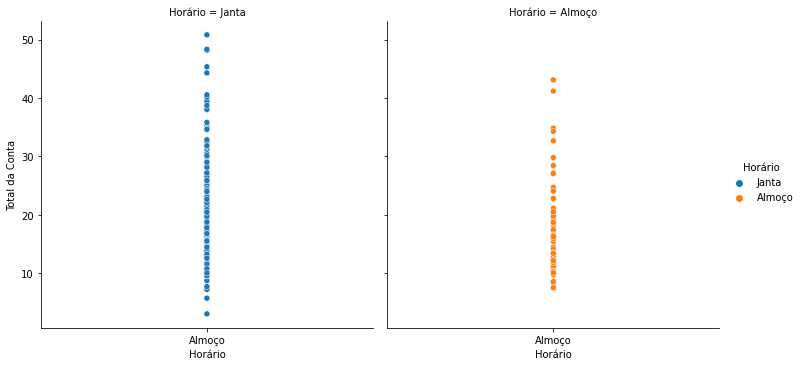

In [42]:
sns.relplot(x='Horário', y='Total da Conta', hue='Horário', col='Horário', data=df)

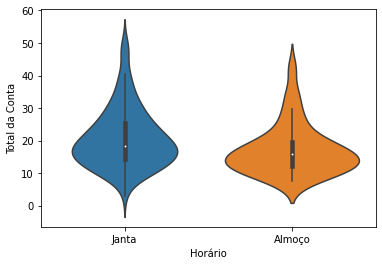

In [45]:
sns.violinplot(x='Horário', y='Total da Conta', data=df)

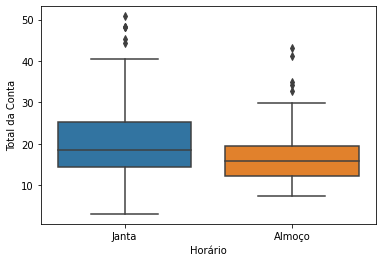

In [46]:
sns.boxplot(x='Horário', y='Total da Conta', data=df)

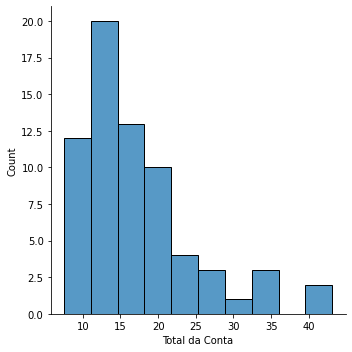

In [57]:
almoco = df.query('Horário == "Almoço"')['Total da Conta']
sns.displot(almoco)